In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! git clone https://github.com/pierinim/tutorials.git
! ls tutorials/Data/JetDataset/

fatal: destination path 'tutorials' already exists and is not an empty directory.
jetImage_7_100p_0_10000.h5	jetImage_7_100p_50000_60000.h5
jetImage_7_100p_10000_20000.h5	jetImage_7_100p_60000_70000.h5
jetImage_7_100p_30000_40000.h5	jetImage_7_100p_70000_80000.h5
jetImage_7_100p_40000_50000.h5	jetImage_7_100p_80000_90000.h5


## opening the file

In [3]:
fileIN = 'tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5'
f = h5py.File(fileIN)
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


'jetImage' contains the image representation of the jets (more later)

'jetImageECAL' and 'jetImageHCAL' are the ECAL- and HCAL-only equivalent images. 
We will not use them (but you are more than welcome to play with it)

'jetConstituentList' is the list of particles cointained in the jet. For each particle, a list of relevant quantities is stored

'particleFeatureNames' is the list of the names corresponding to the quantities contained in 'jetConstituentList'

'jets' is the dataset we consider for the moment
'jetFeatureNames' is the list of the names corresponding to the quantities contained in 'jets'

#let's load and see the feature names

In [4]:
featurenames = f.get('jetFeatureNames')
print(featurenames[:])

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']


The ground truth is incorporated in the ['j_g', 'j_q', 'j_w', 'j_z', 'j_t] vector of boolean, taking the form

[1, 0, 0, 0, 0] for gluons

[0, 1, 0, 0, 0] for quarks

[0, 0, 1, 0, 0] for Ws

[0, 0, 0, 1, 0] for Zs

[0, 0, 0, 0, 1] for tops

This is what is called 'one-hot' encoding of a descrete label (typical of ground truth for classification problems)

We define the 'target' of our problem the set of these labels

In [5]:
jet_data = np.array(f.get('jets'))
target = jet_data[:, -6:-1]
print("Dataset shape:")
print (target.shape)
print ("first five entries:")
for i in range (5):
  print (target[i])
print("last 5 entries:")
for i in range (-5,0):
  print (target[i])

Dataset shape:
(10000, 5)
first five entries:
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
last 5 entries:
[0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]


so the sample contains 10,000 examples in this file.

In [6]:
data = np.array(jet_data[:,:-6])
print(data.shape)

(10000, 53)


In [7]:
#so 10,000 data consist of 53 features

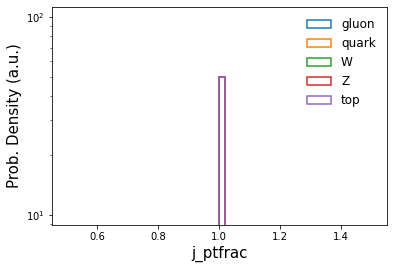

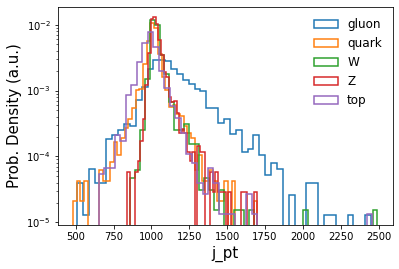

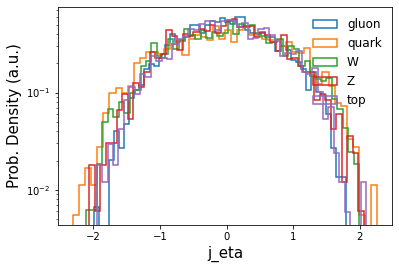

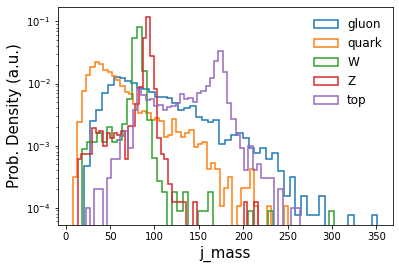

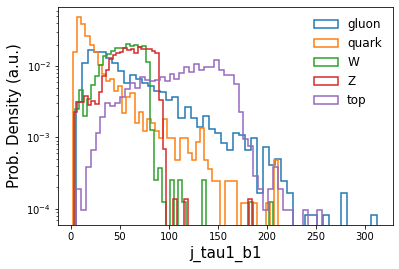

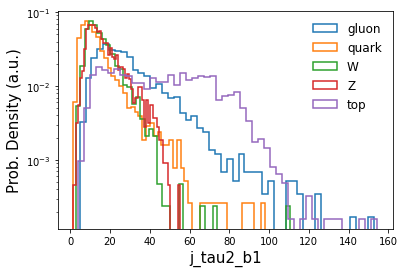

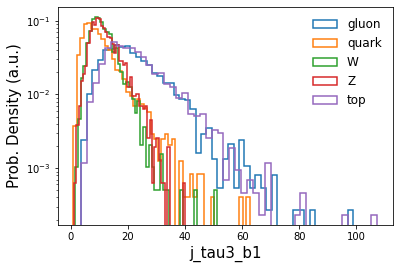

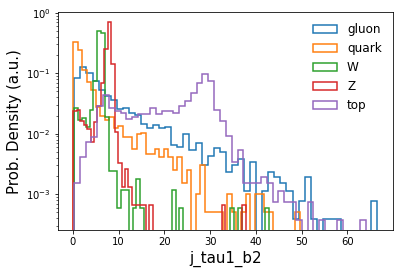

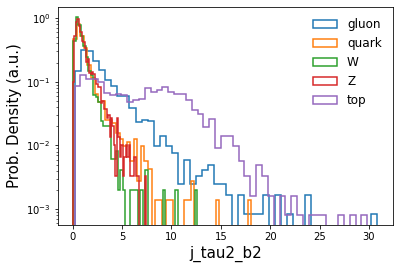

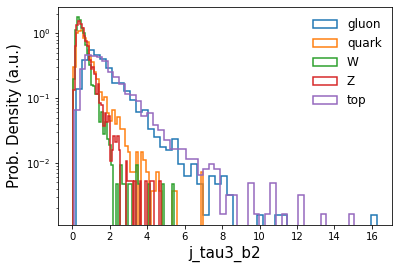

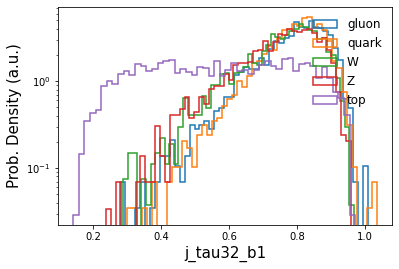

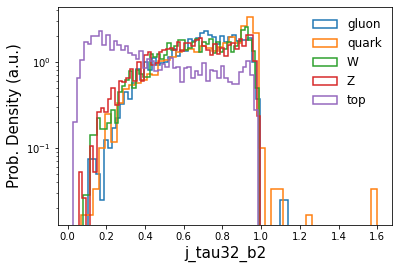

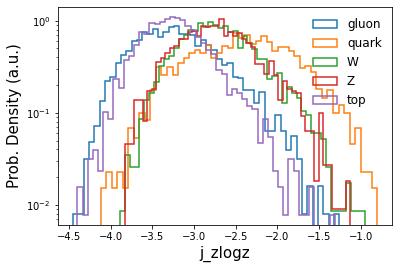

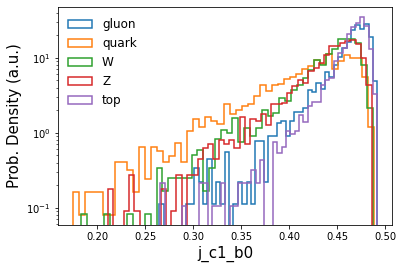

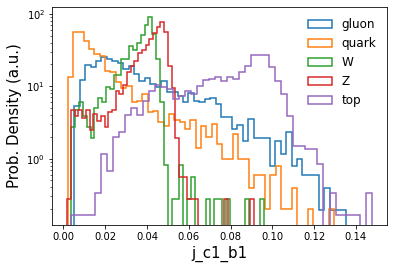

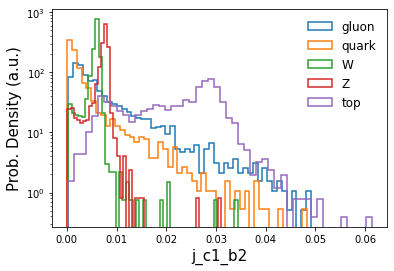

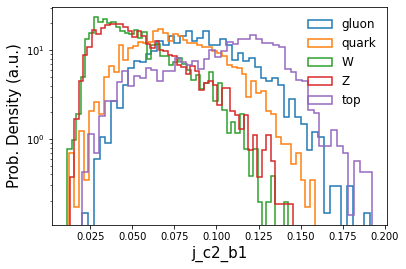

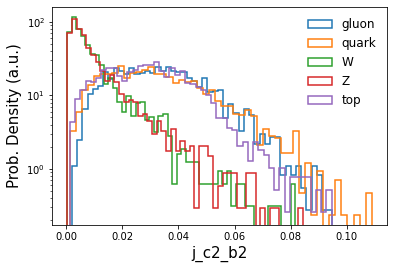

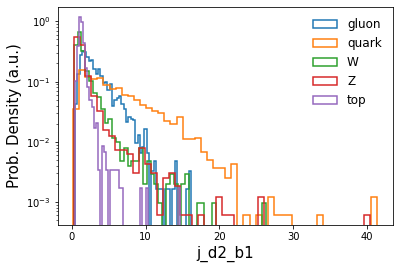

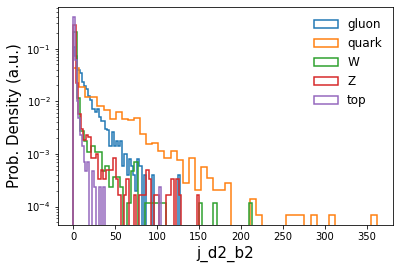

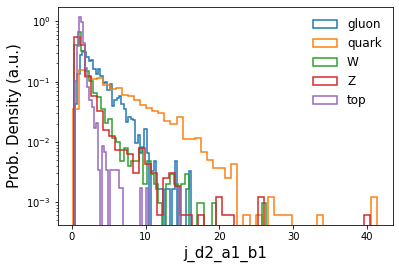

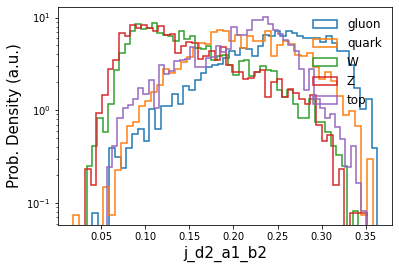

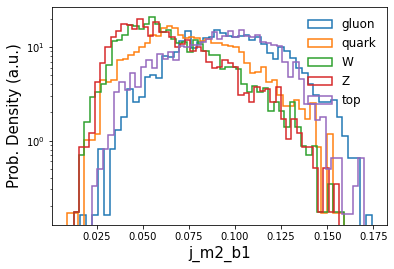

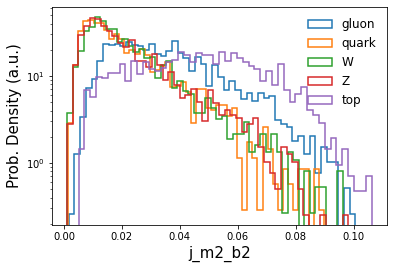

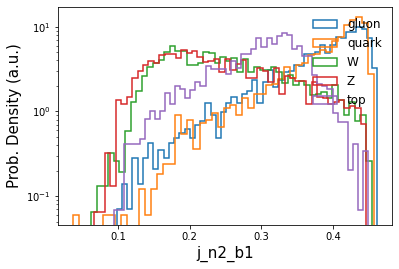

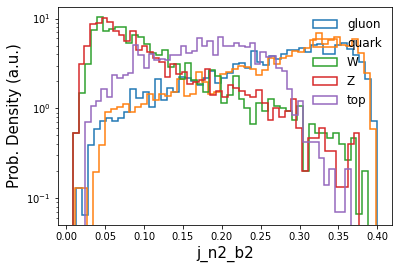

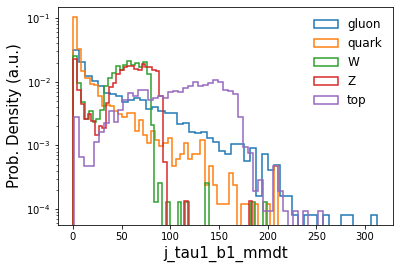

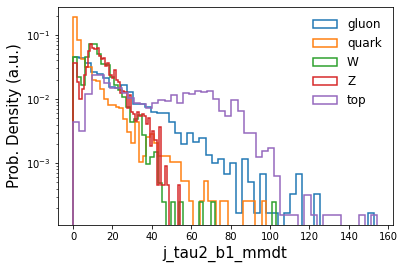

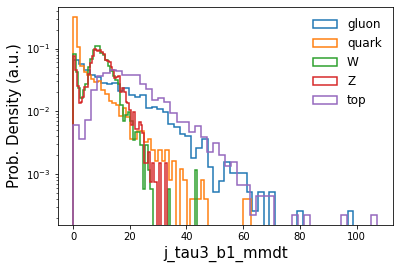

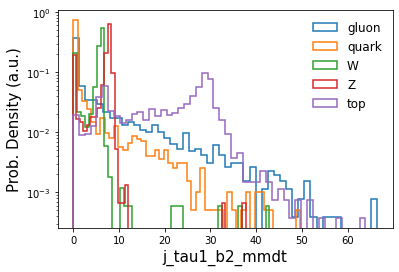

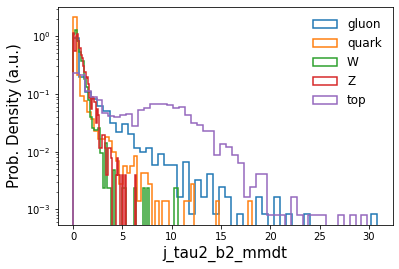

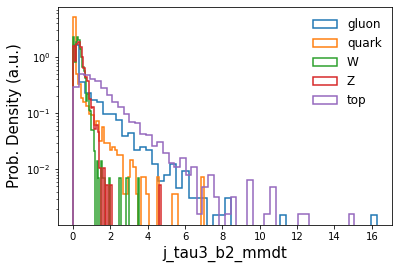

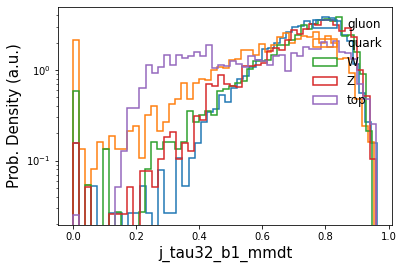

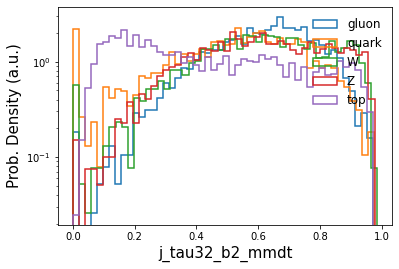

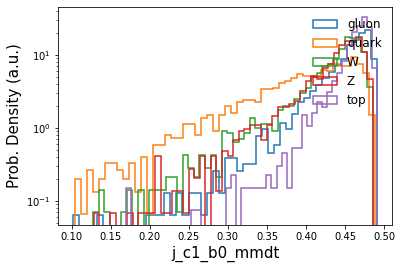

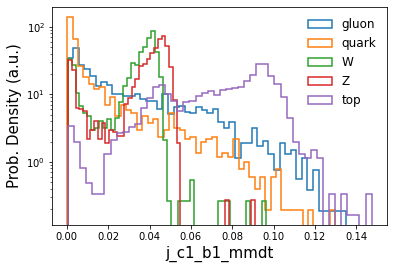

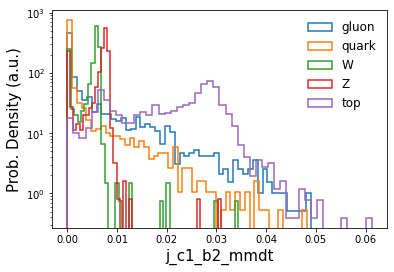

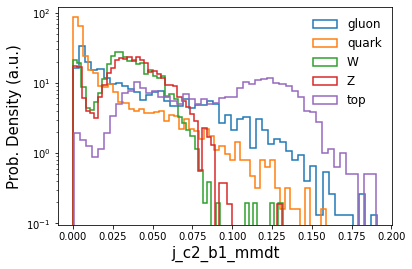

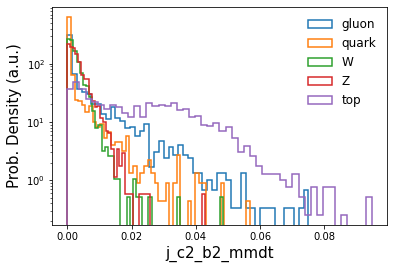

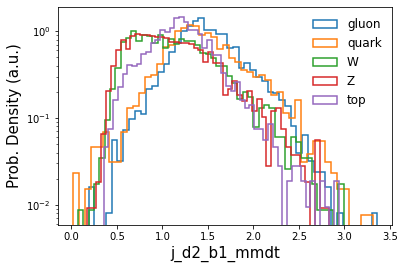

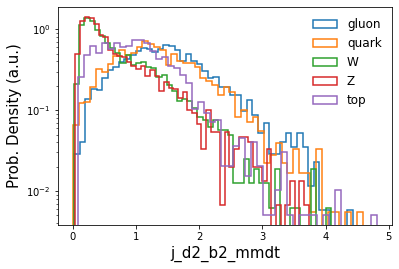

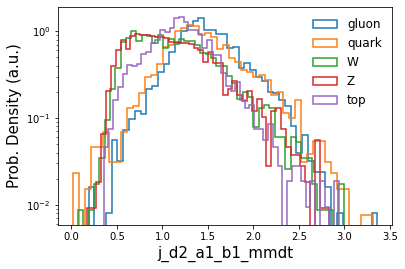

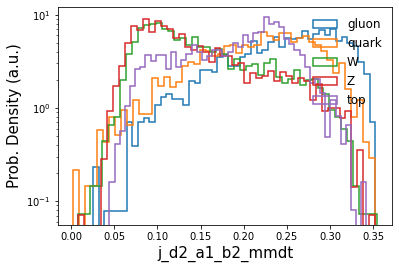

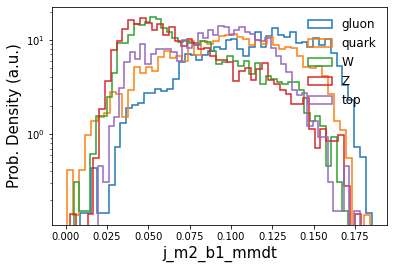

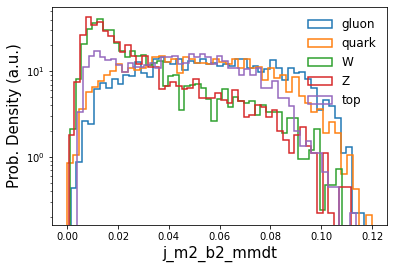

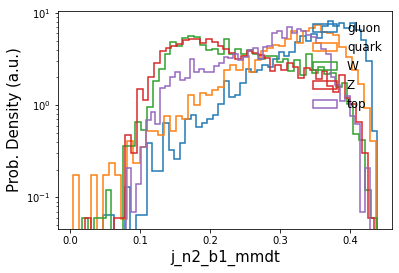

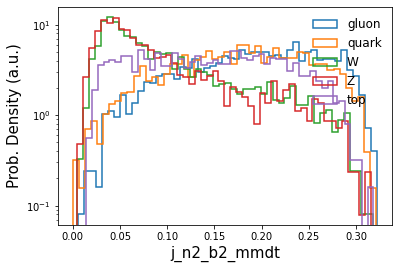

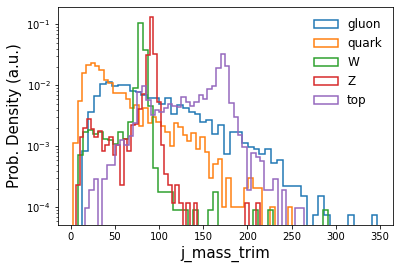

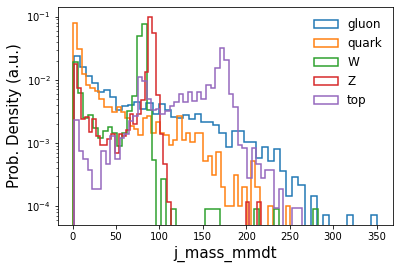

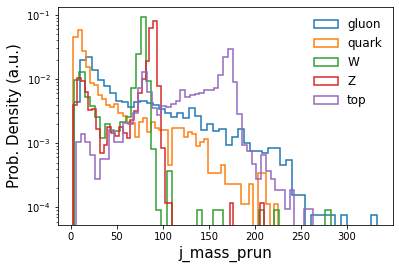

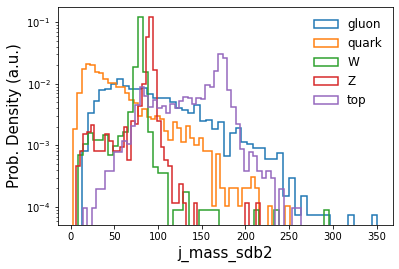

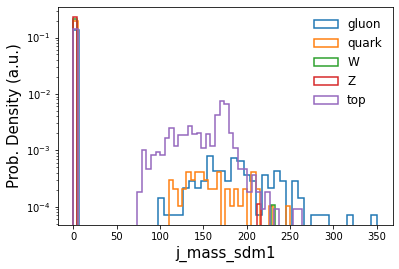

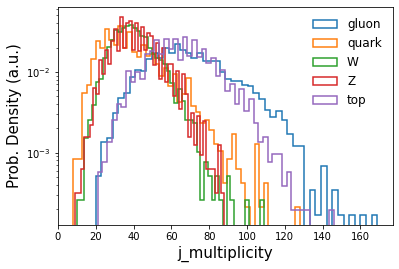

In [8]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        # notice the use of numpy masking to select specific classes of jets
        my_data = input_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log', nonposy='clip')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
for i in range(len(featurenames[:-6])):
    makePlot(i, data, featurenames)
    #fig.show()


so the above graph was the signal and background probability density with respect to even graph.

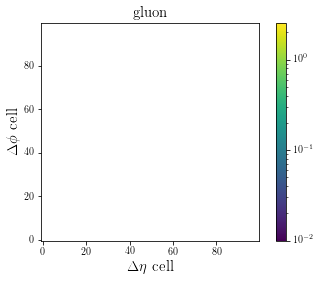

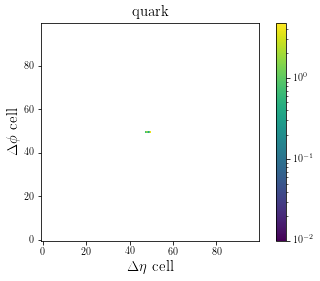

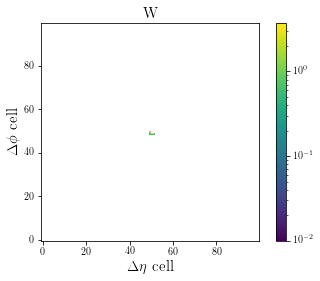

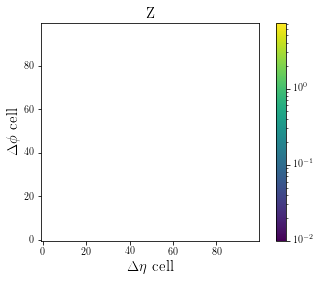

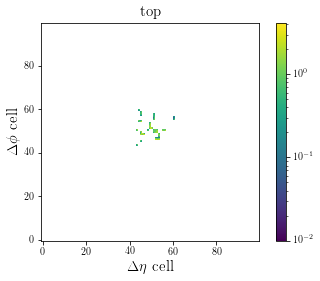

In [10]:
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
pics = np.array(f.get('jetImageECAL'))
pic_g = pics[np.argmax(target, axis=1) == 0]
pic_q = pics[np.argmax(target, axis=1) == 1]
pic_W = pics[np.argmax(target, axis=1) == 2]
pic_Z = pics[np.argmax(target, axis=1) == 3]
pic_t = pics[np.argmax(target, axis=1) == 4]
pics = [pic_q, pic_g, pic_W, pic_Z, pic_t]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(pics)):
    SUM_Image = np.sum(pics[i], axis = 0)
    plt.imshow(SUM_Image/float(pics[i].shape[2]), origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()

so the above graph is the electron calorimeter graph to dtect the energy of the particle or jets.

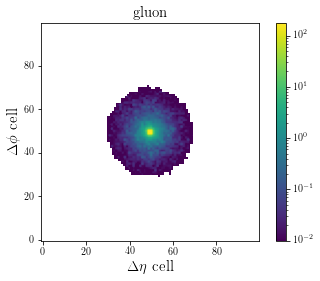

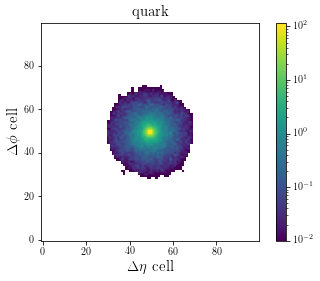

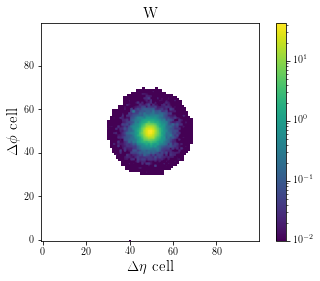

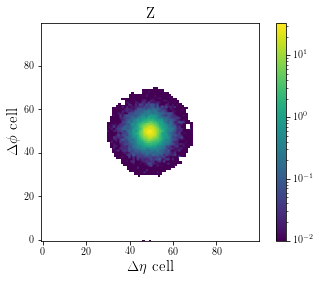

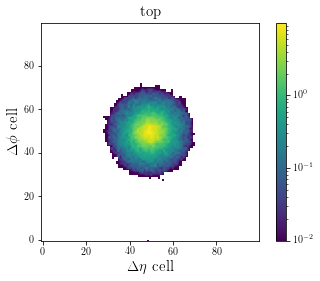

In [11]:
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
images = np.array(f.get('jetImage'))
image_g = images[np.argmax(target, axis=1) == 0]
image_q = images[np.argmax(target, axis=1) == 1]
image_W = images[np.argmax(target, axis=1) == 2]
image_Z = images[np.argmax(target, axis=1) == 3]
image_t = images[np.argmax(target, axis=1) == 4]
images = [image_q, image_g, image_W, image_Z, image_t]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(images)):
    SUM_Image = np.sum(images[i], axis = 0)
    plt.imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()

Above plots are the Jet Images used in the later stage of our ml model to detect the particle and jet structures. 

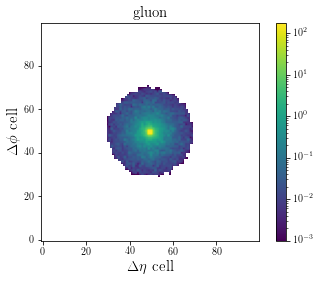

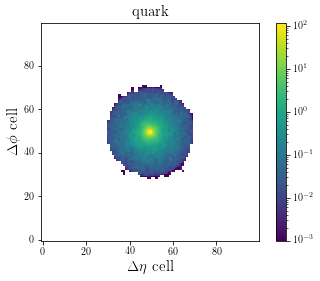

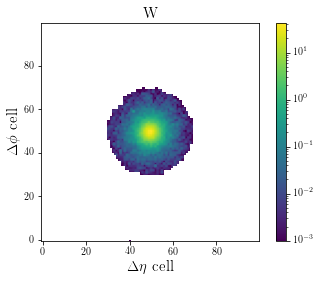

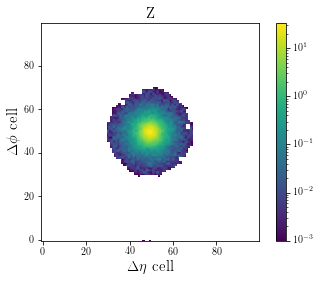

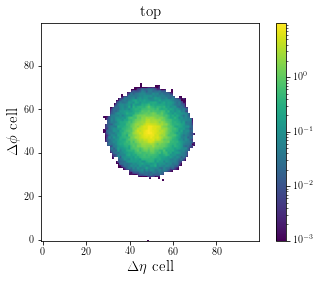

In [12]:
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
hcal_images = np.array(f.get('jetImageHCAL'))
hcal_image_g = hcal_images[np.argmax(target, axis=1) == 0]
hcal_image_q = hcal_images[np.argmax(target, axis=1) == 1]
hcal_image_W = hcal_images[np.argmax(target, axis=1) == 2]
hcal_image_Z = hcal_images[np.argmax(target, axis=1) == 3]
hcal_image_t = hcal_images[np.argmax(target, axis=1) == 4]
hcal_images = [hcal_image_q, hcal_image_g, hcal_image_W, hcal_image_Z, hcal_image_t]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(hcal_images)):
    SUM_hcal_Image = np.sum(hcal_images[i], axis = 0)
    plt.imshow(SUM_hcal_Image/float(hcal_images[i].shape[0]), origin='lower',norm=LogNorm(vmin=0.001))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()

Above These plots looks quite simillar but they are the plots of hardon calorimeter which is a slightly fader than the jet Images. 

In [13]:
#there are other parts like jetConstituents, blah blah blah.. Also you could play with them if you want to ....